In [9]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import imshow
import gdal
import numpy as np

study_area = 'mtbarker'

# get the results ready for comparison
# no change should be np.NaN
# chanage = 1
change = gdal.Open('../' + study_area + '/change_time.img').ReadAsArray()
change[change == 0] = np.nan

peterchange = change.copy()
peterchange[np.isfinite(peterchange)] = 1

# mikechange = changedates_arr.copy()
# mikechange[np.isfinite(mikechange)] = 1
results_save_location = '../' + study_area + '/changeresults_svm.pkl'
svc_raw = np.load(results_save_location)
svc_flag = svc_raw.copy()
svc_flag[np.isfinite(svc_flag)] = 1

results_save_location = '../' + study_area + '/changeresults_rf.pkl'
rf_raw = np.load(results_save_location)
rf_flag = rf_raw.copy()
rf_flag[np.isfinite(rf_flag)] = 1



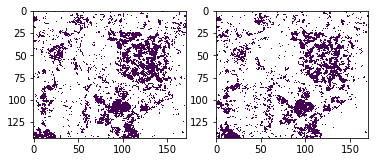

In [10]:
plt.subplot(121)
imshow(rf_flag)
plt.subplot(122)
imshow(svc_flag)

In [11]:
np.nanmean(rf_raw - svc_raw)

-2.1057348

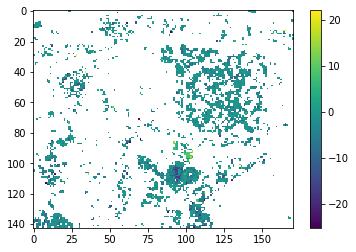

In [13]:
imshow(rf_raw - svc_raw)
plt.colorbar()

In [14]:
import pandas as pd

df = pd.DataFrame({'a': [1,1,2,3,2,4,4,3,2,1,3,4,3,2], 'b':[2,3,4,2,1,3,4,2,1,2,4,2,1,1]})
df

,a,b
0,1,2
1,1,3
2,2,4
3,3,2
4,2,1
5,4,3
6,4,4
7,3,2
8,2,1
9,1,2


In [41]:
df['d'] = df.index // 2
df2 = df.groupby('d').apply(pd.DataFrame.mode)
df2

a    b    c    d
d                      
0 0  1.0  2.0  1.0  0.0
  1  NaN  3.0  NaN  NaN
1 0  2.0  2.0  2.0  1.0
  1  3.0  4.0  NaN  NaN
2 0  2.0  1.0  1.0  2.0
  1  4.0  3.0  3.0  NaN
3 0  3.0  2.0  2.0  3.0
  1  4.0  4.0  4.0  NaN
4 0  1.0  1.0  1.0  4.0
  1  2.0  2.0  NaN  NaN
5 0  3.0  2.0  2.0  5.0
  1  4.0  4.0  3.0  NaN
6 0  2.0  1.0  1.0  6.0
  1  3.0  NaN  NaN  NaN

In [58]:
df3 = df2['b'].unstack(level=-1)
df3cols = list(df3.columns)
df3cols[0] = 'low_mode'
df3.columns = df3cols

df3

,low_mode,1
d,,
0,2.0,3.0
1,2.0,4.0
2,1.0,3.0
3,2.0,4.0
4,1.0,2.0
5,2.0,4.0
6,1.0,NaN


In [59]:
heirarchy = {1: 1, 2: 3, 3: 4, 4:2} # vegetation, earth, water, urban
df3['mode'] = df3['low_mode'].map(heirarchy)
df3

,low_mode,1,mode
d,,,
0,2.0,3.0,3
1,2.0,4.0,3
2,1.0,3.0,1
3,2.0,4.0,3
4,1.0,2.0,1
5,2.0,4.0,3
6,1.0,NaN,1


In [54]:
df

,a,b,c,d
0,1,2,1.0,0
1,1,3,1.0,0
2,2,4,2.0,1
3,3,2,2.0,1
4,2,1,1.0,2
5,4,3,3.0,2
6,4,4,4.0,3
7,3,2,2.0,3
8,2,1,1.0,4
9,1,2,1.0,4


In [57]:
pd.merge(df, df3, how = 'left', left_on='d', right_index = True)
# df2['e'] = df2.applylist(df2.loc[1]['b'])

,a,b,c,d,low_mode,1
0,1,2,1.0,0,2.0,3.0
1,1,3,1.0,0,2.0,3.0
2,2,4,2.0,1,2.0,4.0
3,3,2,2.0,1,2.0,4.0
4,2,1,1.0,2,1.0,3.0
5,4,3,3.0,2,1.0,3.0
6,4,4,4.0,3,2.0,4.0
7,3,2,2.0,3,2.0,4.0
8,2,1,1.0,4,1.0,2.0
9,1,2,1.0,4,1.0,2.0


In [37]:
def getPriority(list):
    heirarchy = {1: 1, 2: 3, 3: 4, 4:2} # vegetation, earth, water, urban
    max_priority = 4
    i_max = 0
for i in mode_arr:
    if heirarchy.index(i) < max_priority:
        max_priority = heirarchy.index(i)
        i_max = i

,a,b,c
d,,,
0,1,3,1.0
1,3,2,2.0
2,2,3,3.0
3,3,2,2.0
4,2,2,1.0
5,3,2,2.0
6,3,1,1.0
